## Data curation, cleaning, ETL

Road the dataset

In [3]:
import pandas as pd

# Read CSV file into a pandas DataFrame
airbnb_df = pd.read_csv('seattle_airbnb.csv')

airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Select the feature and label and drop the NA values.

In [4]:
airbnb_features_and_label_df = airbnb_df[["host_response_time", "host_response_rate",
                                "host_is_superhost", "host_total_listings_count",
                                "host_has_profile_pic", "host_identity_verified", "neighbourhood_group_cleansed",
                                "zipcode", "property_type", "room_type", "accommodates", "bathrooms",
                                "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                                "extra_people", "minimum_nights", "maximum_nights", "availability_365",
                                "number_of_reviews", "review_scores_rating", "review_scores_cleanliness",
                                "review_scores_checkin", "review_scores_communication", "review_scores_location",
                                "review_scores_value", "instant_bookable", "cancellation_policy",
                                "require_guest_profile_picture", "require_guest_phone_verification", "price"]]

airbnb_features_and_label_df = airbnb_features_and_label_df.dropna()

airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98%,t,6.0,t,t,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,$150.00
2,within a few hours,67%,f,2.0,t,t,Queen Anne,98119,House,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,$975.00
4,within an hour,100%,f,2.0,t,t,Queen Anne,98119,House,Entire home/apt,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,$450.00
7,within an hour,100%,t,5.0,t,t,Queen Anne,98119,Cabin,Private room,...,10.0,10.0,10.0,9.0,10.0,f,strict,t,t,$60.00
9,within an hour,98%,t,6.0,t,t,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,f,strict,t,t,$150.00


- Numerical (clean unit marks): host_response_rate (Need clean %), host_total_listings_count, accommodates, bathrooms, bedrooms, beds, security_deposit (Need clean dollar mark), cleaning_fee (Need clean dollar mark), guests_included, extra_people (Need clean dollar mark), minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, price (Need clean dollar mark)


- Categorical (One hot): host_response_time, neighbourhood_group_cleansed, zipcode, property_type, room_type, cancellation_policy


- Binary (t/f to 1/0): host_is_superhost, host_has_profile_pic, host_identity_verified, instant_bookable, require_guest_profile_picture, require_guest_phone_verification

### Cleaning numerical data (remove unit)

In [5]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("$","")
    s = s.replace(",","")

    converted = float(s)
    return converted

airbnb_features_and_label_df["host_response_rate"] = airbnb_features_and_label_df["host_response_rate"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["security_deposit"] = airbnb_features_and_label_df["security_deposit"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["cleaning_fee"] = airbnb_features_and_label_df["cleaning_fee"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["extra_people"] = airbnb_features_and_label_df["extra_people"].apply(clearn_string_and_convert)
airbnb_features_and_label_df["price"] = airbnb_features_and_label_df["price"].apply(clearn_string_and_convert)


airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,t,6.0,t,t,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,150.0
2,within a few hours,67.0,f,2.0,t,t,Queen Anne,98119,House,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,975.0
4,within an hour,100.0,f,2.0,t,t,Queen Anne,98119,House,Entire home/apt,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,450.0
7,within an hour,100.0,t,5.0,t,t,Queen Anne,98119,Cabin,Private room,...,10.0,10.0,10.0,9.0,10.0,f,strict,t,t,60.0
9,within an hour,98.0,t,6.0,t,t,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,f,strict,t,t,150.0


### Cleaning binary data (t/f to 1/0)

In [6]:
# Convert binary features to 1 or 0
binary_features = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified",
                   "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification"]

for feature in binary_features:
    airbnb_features_and_label_df[feature] = airbnb_features_and_label_df[feature].map({"t": 1, "f": 0})

# Print the head of the DataFrame
airbnb_features_and_label_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,1,6.0,1,1,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,150.0
2,within a few hours,67.0,0,2.0,1,1,Queen Anne,98119,House,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,975.0
4,within an hour,100.0,0,2.0,1,1,Queen Anne,98119,House,Entire home/apt,...,9.0,10.0,10.0,9.0,9.0,0,strict,0,0,450.0
7,within an hour,100.0,1,5.0,1,1,Queen Anne,98119,Cabin,Private room,...,10.0,10.0,10.0,9.0,10.0,0,strict,1,1,60.0
9,within an hour,98.0,1,6.0,1,1,Queen Anne,98119,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,9.0,0,strict,1,1,150.0


### Cleaning categorical data (one-hot encoding)

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical features for one-hot encoding
categorical_features = ["host_response_time", "neighbourhood_group_cleansed", "zipcode",
                        "property_type", "room_type", "cancellation_policy"]

# Loop through each categorical feature and apply one-hot encoding
for feature in categorical_features:
    # Convert the feature to a list
    feature_to_list = airbnb_features_and_label_df[feature].to_list()
    
    feature_to_list_of_lists = []

    for value in feature_to_list:
        feature_to_list_of_lists.append([value])
    
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder()
    
    # Fit and transform the feature
    encoder.fit(feature_to_list_of_lists)
    
    # Now transform each example in our data into 1-hot form
    features_transformed = encoder.transform(feature_to_list_of_lists)
    
    # Transform the result object into a matrix
    features_transformed = features_transformed.toarray()
    
    # create a dataframe back from the array
    features_transformed_df = pd.DataFrame(features_transformed)
    
    # Now concatenate this feature back to the original dataframe 
    airbnb_features_and_label_df.reset_index(drop=True, inplace=True)
    features_transformed_df.reset_index(drop=True, inplace=True)

    airbnb_features_and_label_df = pd.concat([airbnb_features_and_label_df,features_transformed_df], axis=1)
    
    # We don't need actor1_name now since we have already transformed it
    airbnb_features_and_label_df = airbnb_features_and_label_df.drop(columns=[feature], axis=1)

airbnb_features_and_label_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Divide into the features and the label (price).

In [8]:
# Define the features DataFrame
airbnb_features_df = airbnb_features_and_label_df.drop(columns=["price"])

# Define the labels DataFrame
airbnb_label_df = airbnb_features_and_label_df[["price"]]

In [9]:
# Print the head of the transformed DataFrame
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Print the label
airbnb_label_df.head()

,price
0,150.0
1,975.0
2,450.0
3,60.0
4,150.0


### Scaling

StandardScaler

In [11]:
# from sklearn.preprocessing import StandardScaler

# # Select numerical features for standard scaling
# numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
#                       "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
#                       "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
#                       "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
#                       "review_scores_communication", "review_scores_location", "review_scores_value"]

# # Apply StandardScaler to numerical features
# scaler = StandardScaler()
# airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# # Print the head of the DataFrame with scaled numerical features
# airbnb_features_df.head()


MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for MinMax scaling
numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
                      "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                      "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
                      "review_scores_communication", "review_scores_location", "review_scores_value"]

# Apply MinMaxScaler to numerical features
scaler = MinMaxScaler()
airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# Print the head of the DataFrame with scaled numerical features
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,...,8,9,10,11,0,1,2,0,1,2
0,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.602410,0,0.012048,1,1,0.666667,1.000000,0.714286,0.428571,0.376299,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0,0.012048,1,1,0.333333,0.444444,0.428571,0.142857,0.251559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,1,0.048193,1,1,0.066667,0.222222,0.142857,0.000000,0.022869,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_actual = [1,1,1,0,0,0]
y_pred_scores = [0.8,0.9,0.6,0.55,0.45,0.2]

### Feature selection
Model and label agnostic feature selection
Methods under this category only work with feature columns and typically used to throw away random, noisy and non-informative features. This could be very useful especially in **unsupervised learning**, because we don't have labels there. 

Correlation-based feature selection 

In [15]:
# we are only selecting the features passed the variation threshold
scaled_features_df = airbnb_features_df[['accommodates','bathrooms','bedrooms','cleaning_fee','maximum_nights','availability_365']]

scaled_features_df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,maximum_nights,availability_365
0,0.200000,0.222222,0.142857,0.118644,0.077540,0.797260
1,0.666667,1.000000,0.714286,1.000000,0.024064,0.602740
2,0.333333,0.444444,0.428571,0.406780,1.000000,1.000000
3,0.066667,0.222222,0.142857,0.067797,0.003565,0.273973
4,0.200000,0.222222,0.142857,0.118644,0.322638,0.887671


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.9 MB/s eta 0:00:00a 0:00:01


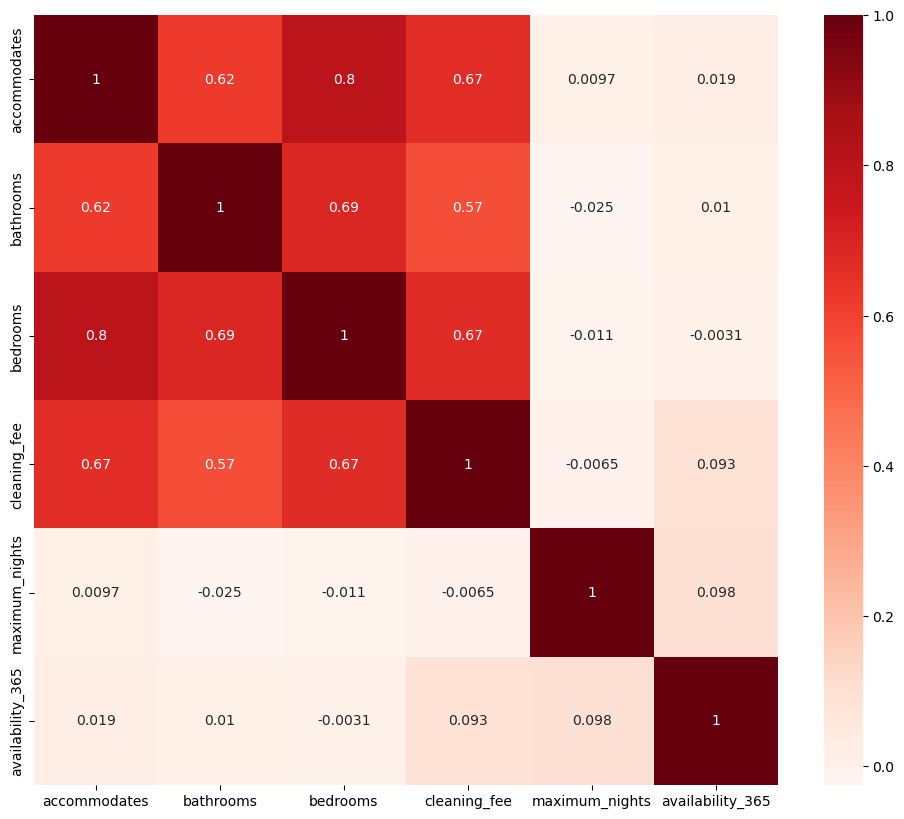

In [16]:
'''
Correlation-based feature selection: This technique involves selecting features based on 
their correlation with the target variable. In linear regression, features with a higher 
correlation with the target variable are more likely to be useful in predicting the target variable.
**Idea:** any feature that is correlated with another set of features with a pearson correlation of > 0.5 can be removed.

'''

try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
    
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
cor = scaled_features_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


??Principal component analysis (PCA): PCA is a technique that transforms 
a set of correlated variables into a set of uncorrelated variables called principal components.
In linear regression, PCA can be used to reduce the dimensionality of the feature space 
while still preserving most of the variability in the data.



??Recursive feature elimination (RFE): RFE is an iterative technique that starts with 
all features and removes the least significant feature in each iteration until the 
desired number of features is reached. In linear regression, RFE can be used to select 
a subset of features that have the highest impact on the target variable.


### Model agnostic but label aware feature selection 
We aim to select the features which are highly dependent on the label.

Chi-squared test 


In [17]:
from sklearn.feature_selection import chi2

chi_scores = chi2(scaled_features_df,airbnb_label_df)

print ("Ranking based on chi-squared test")
feature_columns = ['accommodates','bathrooms','bedrooms','cleaning_fee','maximum_nights','availability_365']

score_list = []
for i, feature in enumerate(feature_columns):
    score_list.append([chi_scores[1][i],feature])

sorted_score_list = sorted(score_list)

print(f"Printing ranked features based on chi-squared value")
print("lower p-value indicates feature and label are dependent)")
for score, feature in sorted_score_list:
    print (f"Feature {feature} : p-value {score}")

Ranking based on chi-squared test
Printing ranked features based on chi-squared value
lower p-value indicates feature and label are dependent)
Feature cleaning_fee : p-value 0.999999999705564
Feature accommodates : p-value 0.9999999999944549
Feature bedrooms : p-value 0.9999999999999991
Feature availability_365 : p-value 1.0
Feature bathrooms : p-value 1.0
Feature maximum_nights : p-value 1.0


As a rule of thumb, we take the features with p-values <0.05 as features that are significantly dependent on labels. So based on this, we will select the following features: ( something is wrong here, cannot choose anything to move forward)



## Model Training and Selection

In [18]:
from sklearn.model_selection import train_test_split

features = airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (1320, 92)
Label's shape [no. of examples * 1] = (1320, 1)


In [19]:
# First derive the test data
x_, x_test, y_, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# Then create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")

Training: Features' shape [no. of examples * feature vector size] =  (1069, 92)
Training: Label's shape [no. of examples * 1] = (1069, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (119, 92)
Validation: Label's shape [no. of examples * 1] = (119, 1)
Test: Features' shape [no. of examples * feature vector size] =  (132, 92)
Test: Label's shape [no. of examples * 1] = (132, 1)


### Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training 
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


In [21]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation.statistic}")

Mean Squared Error on training data 3256.2996049360795
Mean Absolute Error on training data 38.09351325757576
Pearson correlation coefficient between training and test data is 0.7533031529103998


### K-fold way

used: 
Decision Tree Regression
Support Vector Regression
Random Forest Regression
Neural Network Regression

Need: gredient descent 


In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression  

DTR = DecisionTreeRegressor()
SVR = SVR()
RFR = RandomForestRegressor()
MLR = MLPRegressor(max_iter=1000)
LR = LinearRegression() 

all_models = {"DTR": DTR,
              "SVR": SVR,
              "RFR": RFR,
              "MLR": MLR,
              "LR": LR}  # Added LR to the dictionary of all models

print(f"We are working with classifiers {all_models.keys()}")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# First extract our test data and store it in x_test, y_test
features = airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5  # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model, _x, _y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print(f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy:
        best_model_name = model_name
        best_model_valid_accuracy = average_cv_score
        best_model = model

print(f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

We are working with classifiers dict_keys(['DTR', 'SVR', 'RFR', 'MLR', 'LR'])


NameError: name 'airbnb_features_df' is not defined

In [23]:
# we can also use gredient descent ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

DTR = DecisionTreeRegressor(max_depth=5)
SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
RFR = RandomForestRegressor(n_estimators=100, max_depth=5)
MLR = MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.01, max_iter=500)


all_models = {"DTR":DTR, 
              "SVR":SVR,
              "RFR":RFR,
              "MLR":MLR}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['DTR', 'SVR', 'RFR', 'MLR'])


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# First extract our test data and store it in x_test, y_test
features = airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5 # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

Mean cross validation accuracy for model DTR = 0.42176829439323144
Mean cross validation accuracy for model SVR = 0.041024948431045295
Mean cross validation accuracy for model RFR = 0.5735673391611098


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.wa

Mean cross validation accuracy for model MLR = 0.5719319946023271
Best model is RFR with 5-fold accuracy of 0.5735673391611098


/Users/jin/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Model Aware Feature Seleciton

This way of feature selection assumes that we will select features based on an underlying ML model. 
Feature ablation study is an example of model aware feature selection. 
We can select feature by applying L1 regularization on a parametric model (such as SVM or LR). This is called the `Lasso` method. 

Feature ablation study

Lasso Regularization

Lasso regression: Lasso regression is a linear regression technique that performs regularization 
by adding a penalty term to the sum of the absolute values of the coefficients. 
This technique can be used to select a subset of features that have a non-zero coefficient.
